## Job Recomendation Using Knowledge Graph

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
from mlxtend.frequent_patterns import apriori, association_rules


#### Importing Dataset

In [79]:
jd = pd.read_csv("Job Description Dataset/dice_com-job_us_sample.csv")

In [80]:
dataset = pd.read_csv("Resume_Dataset/survey_results_public.csv")

C:\Users\Amit\AppData\Local\Temp\ipykernel_25868\2165978649.py:1: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("Resume_Dataset/survey_results_public.csv")


## Data Cleaning
#### Creating resume subset using relavent dimensionality

In [81]:
resume_subset= dataset[['Respondent','Country','Student','CompanySize','Dependents','DevType','Gender','JobSatisfaction','LastNewJob','Salary','SalaryType','LanguageWorkedWith','LanguageDesireNextYear','DatabaseWorkedWith','DatabaseDesireNextYear','PlatformWorkedWith','PlatformDesireNextYear','FrameworkWorkedWith','FrameworkDesireNextYear','OperatingSystem','Age']]
df = pd.DataFrame(resume_subset)
df

,Respondent,Country,Student,CompanySize,Dependents,DevType,Gender,JobSatisfaction,LastNewJob,Salary,...,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,OperatingSystem,Age
0,1,Kenya,No,20 to 99 employees,Yes,Full-stack developer,Male,Extremely satisfied,Less than a year ago,NaN,...,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Linux-based,25 - 34 years old
1,3,United Kingdom,No,"10,000 or more employees",Yes,Database administrator;DevOps specialist;Full-...,Male,Moderately dissatisfied,More than 4 years ago,51000,...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,Linux-based,35 - 44 years old
2,4,United States,No,20 to 99 employees,NaN,Engineering manager;Full-stack developer,NaN,Moderately satisfied,Less than a year ago,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,United States,No,100 to 499 employees,No,Full-stack developer,Male,Neither satisfied nor dissatisfied,Less than a year ago,NaN,...,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,NaN,Angular;.NET Core;React,Windows,35 - 44 years old
4,7,South Africa,"Yes, part-time","10,000 or more employees",Yes,Data or business analyst;Desktop or enterprise...,Male,Slightly satisfied,Between 1 and 2 years ago,260000,...,C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,Arduino;Windows Desktop or Server,NaN,NaN,Windows,18 - 24 years old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98850,101513,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98851,101531,Spain,"Yes, full-time",NaN,NaN,Back-end developer;Front-end developer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98852,101541,India,"Yes, full-time",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98853,101544,Russian Federation,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Handling NA Values

In [82]:
resume_subset.isna().sum()

Respondent                     0
Country                      412
Student                     3954
CompanySize                27324
Dependents                 36259
DevType                     6757
Gender                     34386
JobSatisfaction            29579
LastNewJob                 19966
Salary                     48277
SalaryType                 47785
LanguageWorkedWith         20521
LanguageDesireNextYear     25611
DatabaseWorkedWith         32585
DatabaseDesireNextYear     41357
PlatformWorkedWith         32856
PlatformDesireNextYear     37502
FrameworkWorkedWith        47235
FrameworkDesireNextYear    43637
OperatingSystem            22676
Age                        34281
dtype: int64

In [83]:
resume_subset.describe()

,Respondent
count,98855.000000
mean,50822.971635
std,29321.650410
min,1.000000
25%,25443.500000
50%,50823.000000
75%,76219.500000
max,101592.000000


In [84]:
dataset.columns

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)

In [85]:
resume_subset.dtypes

Respondent                  int64
Country                    object
Student                    object
CompanySize                object
Dependents                 object
DevType                    object
Gender                     object
JobSatisfaction            object
LastNewJob                 object
Salary                     object
SalaryType                 object
LanguageWorkedWith         object
LanguageDesireNextYear     object
DatabaseWorkedWith         object
DatabaseDesireNextYear     object
PlatformWorkedWith         object
PlatformDesireNextYear     object
FrameworkWorkedWith        object
FrameworkDesireNextYear    object
OperatingSystem            object
Age                        object
dtype: object

In [86]:
Resume= resume_subset.dropna()
Resume

,Respondent,Country,Student,CompanySize,Dependents,DevType,Gender,JobSatisfaction,LastNewJob,Salary,...,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,OperatingSystem,Age
1,3,United Kingdom,No,"10,000 or more employees",Yes,Database administrator;DevOps specialist;Full-...,Male,Moderately dissatisfied,More than 4 years ago,51000,...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,Linux-based,35 - 44 years old
17,27,Sweden,No,10 to 19 employees,Yes,Back-end developer,Male,Moderately satisfied,Between 1 and 2 years ago,32000,...,C#;SQL;HTML;CSS;Bash/Shell,C#;F#;Haskell;SQL;Ocaml,SQL Server,Redis;SQL Server;PostgreSQL;Elasticsearch,Linux;Windows Desktop or Server,Linux;Windows Desktop or Server,.NET Core,.NET Core,Windows,35 - 44 years old
20,33,Australia,No,"1,000 to 4,999 employees",Yes,Database administrator;Full-stack developer;Mo...,Male,Slightly satisfied,Between 2 and 4 years ago,120000,...,C;C++;Go;Python;SQL;Swift,C;C++;Go;Python;SQL;Swift;Kotlin,Redis;PostgreSQL;SQLite,Redis;PostgreSQL;SQLite;Google BigQuery,Android;AWS;iOS;Linux;Mac OS;Firebase,Android;AWS;Google Cloud Platform/App Engine;i...,Angular;Node.js,Angular;Node.js;TensorFlow,MacOS,35 - 44 years old
22,37,United Kingdom,No,20 to 99 employees,No,Back-end developer;Database administrator;Desi...,Male,Slightly satisfied,More than 4 years ago,25,...,C#;JavaScript;PHP;SQL;HTML;CSS,C#;JavaScript;PHP;SQL;HTML;CSS,MySQL,SQL Server;MySQL,Linux;Mac OS;Windows Desktop or Server,Linux;Mac OS;Windows Desktop or Server,.NET Core,.NET Core,Windows,25 - 34 years old
24,39,India,No,100 to 499 employees,No,Mobile developer,Female;Male,Moderately satisfied,Between 1 and 2 years ago,700000,...,C;C++;Java;JavaScript;SQL;Swift;Kotlin,Java;JavaScript;Swift;Kotlin,SQL Server;MySQL,MySQL,Android;iOS;Firebase,Android;iOS;Firebase,Angular;Cordova,Cordova,MacOS,25 - 34 years old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71504,101559,Italy,No,100 to 499 employees,No,Front-end developer;Game or graphics developer...,Male,Moderately satisfied,Less than a year ago,25000,...,C#;Java;JavaScript;Matlab;HTML;CSS,C;C++;Java;JavaScript;TypeScript;VB.NET;HTML;CSS,MySQL;PostgreSQL,MongoDB;MySQL;PostgreSQL;SQLite;Microsoft Azur...,Android;iOS;Windows Phone,Gaming console;iOS;Raspberry Pi;Windows Deskto...,Angular;Cordova,Hadoop;Node.js;React;Xamarin,Windows,25 - 34 years old
71510,101567,Australia,"Yes, full-time","10,000 or more employees",No,Back-end developer,Male,Moderately satisfied,Between 1 and 2 years ago,140000,...,Java;JavaScript;SQL;Bash/Shell,Java;JavaScript;Python;Ruby;TypeScript;Kotlin,MySQL;PostgreSQL;Amazon DynamoDB;Amazon Redshi...,Amazon DynamoDB,Amazon Echo;Android,Amazon Echo,Node.js;React;Spring,Spring,MacOS,25 - 34 years old
71512,101569,Russian Federation,No,20 to 99 employees,No,Back-end developer,Male,Extremely satisfied,Less than a year ago,100000,...,Java;SQL,Java;SQL;Kotlin,Redis;PostgreSQL,Cassandra;Redis;PostgreSQL;Elasticsearch,Linux;Windows Desktop or Server,Android;Linux;Windows Desktop or Server,Spring,Spring,Windows,25 - 34 years old
71524,101584,United States,"Yes, full-time",20 to 99 employees,No,"Back-end developer;C-suite executive (CEO, CTO...",Male,Extremely satisfied,More than 4 years ago,165000,...,C#;Clojure;Go;Java;JavaScript;PHP;R;SQL;HTML;C...,Clojure;R,Redis;SQL Server;PostgreSQL;Microsoft Azure (T...,Redis;PostgreSQL,AWS;Azure;Google Cloud Platform/App Engine;Lin...,Linux,Django;Node.js;React;TensorFlow;Torch/PyTorch,Django;React;TensorFlow;Torch/PyTorch,MacOS,35 - 44 years old


#### Data Cleaning : DevType

In [87]:
Resume['DevType'].value_counts()

Full-stack developer                                                                                                                                                                1133
Back-end developer;Front-end developer;Full-stack developer                                                                                                                         1006
Back-end developer                                                                                                                                                                   935
Back-end developer;Full-stack developer                                                                                                                                              703
Back-end developer;Front-end developer;Full-stack developer;Mobile developer                                                                                                         315
                                                                           

Removing dev type category having less than 100 entries in dataset

In [88]:
Resume.iloc[0]['DevType']

'Database administrator;DevOps specialist;Full-stack developer;System administrator'

In [89]:
Devtype_value= Resume['DevType'].value_counts()
Resume2= Resume.copy()
Resume2['DevType'] = Resume2['DevType'].str.replace(';',',')
Resume2['DevType'] = Resume2[[Resume2.columns[5]]].values.tolist()

for index,data in Resume2.iterrows():
    empList=[]
    array_devtype= data['DevType']
    for dev in array_devtype:
        devsplit= dev.split(',')
    Resume2.at[index,'DevType']=devsplit 
        
Resume2.iloc[0]['DevType']

['Database administrator',
 'DevOps specialist',
 'Full-stack developer',
 'System administrator']

In [90]:
DevType_co = pd.Series(Counter(chain.from_iterable(Resume2.DevType.dropna())))
DevType_co

Database administrator                            2449
DevOps specialist                                 2318
Full-stack developer                              9490
System administrator                              1818
Back-end developer                               10065
Mobile developer                                  2854
Designer                                          1592
Desktop or enterprise applications developer      2842
Front-end developer                               6381
Engineering manager                               1086
Embedded applications or devices developer         528
QA or test developer                              1085
Data scientist or machine learning specialist     1110
Student                                            983
Data or business analyst                          1215
C-suite executive (CEO                             448
 CTO                                               448
 etc.)                                             448
Product ma

In [91]:
Resume2.shape[0]

14253

#### Data Cleaning : Age

In [92]:
Resume2['Age'].value_counts()

25 - 34 years old     8085
18 - 24 years old     2900
35 - 44 years old     2588
45 - 54 years old      544
55 - 64 years old      110
Under 18 years old      21
65 years or older        5
Name: Age, dtype: int64

#### Data Cleaning : Operating System

In [93]:
Resume2['OperatingSystem'].value_counts()

Windows        6957
MacOS          4318
Linux-based    2965
BSD/Unix         13
Name: OperatingSystem, dtype: int64

#### Data Cleaning : Location
Location entries having more than 50 resumes/respondents are considered

In [94]:
location= Resume2['Country'].value_counts()
location[location>50].sum()

13170

In [95]:
Resume3= Resume2[Resume2['Country'].isin(location[location>50].index)]
Resume3

,Respondent,Country,Student,CompanySize,Dependents,DevType,Gender,JobSatisfaction,LastNewJob,Salary,...,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,OperatingSystem,Age
1,3,United Kingdom,No,"10,000 or more employees",Yes,"[Database administrator, DevOps specialist, Fu...",Male,Moderately dissatisfied,More than 4 years ago,51000,...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,Linux-based,35 - 44 years old
17,27,Sweden,No,10 to 19 employees,Yes,[Back-end developer],Male,Moderately satisfied,Between 1 and 2 years ago,32000,...,C#;SQL;HTML;CSS;Bash/Shell,C#;F#;Haskell;SQL;Ocaml,SQL Server,Redis;SQL Server;PostgreSQL;Elasticsearch,Linux;Windows Desktop or Server,Linux;Windows Desktop or Server,.NET Core,.NET Core,Windows,35 - 44 years old
20,33,Australia,No,"1,000 to 4,999 employees",Yes,"[Database administrator, Full-stack developer,...",Male,Slightly satisfied,Between 2 and 4 years ago,120000,...,C;C++;Go;Python;SQL;Swift,C;C++;Go;Python;SQL;Swift;Kotlin,Redis;PostgreSQL;SQLite,Redis;PostgreSQL;SQLite;Google BigQuery,Android;AWS;iOS;Linux;Mac OS;Firebase,Android;AWS;Google Cloud Platform/App Engine;i...,Angular;Node.js,Angular;Node.js;TensorFlow,MacOS,35 - 44 years old
22,37,United Kingdom,No,20 to 99 employees,No,"[Back-end developer, Database administrator, D...",Male,Slightly satisfied,More than 4 years ago,25,...,C#;JavaScript;PHP;SQL;HTML;CSS,C#;JavaScript;PHP;SQL;HTML;CSS,MySQL,SQL Server;MySQL,Linux;Mac OS;Windows Desktop or Server,Linux;Mac OS;Windows Desktop or Server,.NET Core,.NET Core,Windows,25 - 34 years old
24,39,India,No,100 to 499 employees,No,[Mobile developer],Female;Male,Moderately satisfied,Between 1 and 2 years ago,700000,...,C;C++;Java;JavaScript;SQL;Swift;Kotlin,Java;JavaScript;Swift;Kotlin,SQL Server;MySQL,MySQL,Android;iOS;Firebase,Android;iOS;Firebase,Angular;Cordova,Cordova,MacOS,25 - 34 years old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71504,101559,Italy,No,100 to 499 employees,No,"[Front-end developer, Game or graphics develop...",Male,Moderately satisfied,Less than a year ago,25000,...,C#;Java;JavaScript;Matlab;HTML;CSS,C;C++;Java;JavaScript;TypeScript;VB.NET;HTML;CSS,MySQL;PostgreSQL,MongoDB;MySQL;PostgreSQL;SQLite;Microsoft Azur...,Android;iOS;Windows Phone,Gaming console;iOS;Raspberry Pi;Windows Deskto...,Angular;Cordova,Hadoop;Node.js;React;Xamarin,Windows,25 - 34 years old
71510,101567,Australia,"Yes, full-time","10,000 or more employees",No,[Back-end developer],Male,Moderately satisfied,Between 1 and 2 years ago,140000,...,Java;JavaScript;SQL;Bash/Shell,Java;JavaScript;Python;Ruby;TypeScript;Kotlin,MySQL;PostgreSQL;Amazon DynamoDB;Amazon Redshi...,Amazon DynamoDB,Amazon Echo;Android,Amazon Echo,Node.js;React;Spring,Spring,MacOS,25 - 34 years old
71512,101569,Russian Federation,No,20 to 99 employees,No,[Back-end developer],Male,Extremely satisfied,Less than a year ago,100000,...,Java;SQL,Java;SQL;Kotlin,Redis;PostgreSQL,Cassandra;Redis;PostgreSQL;Elasticsearch,Linux;Windows Desktop or Server,Android;Linux;Windows Desktop or Server,Spring,Spring,Windows,25 - 34 years old
71524,101584,United States,"Yes, full-time",20 to 99 employees,No,"[Back-end developer, C-suite executive (CEO, ...",Male,Extremely satisfied,More than 4 years ago,165000,...,C#;Clojure;Go;Java;JavaScript;PHP;R;SQL;HTML;C...,Clojure;R,Redis;SQL Server;PostgreSQL;Microsoft Azure (T...,Redis;PostgreSQL,AWS;Azure;Google Cloud Platform/App Engine;Lin...,Linux,Django;Node.js;React;TensorFlow;Torch/PyTorch,Django;React;TensorFlow;Torch/PyTorch,MacOS,35 - 44 years old


In [96]:
Country_count=Resume3['Country'].unique()
len(Country_count)

44

#### Data Cleaning : Gender
Categorising Gender into Male,Female and others

In [97]:
gender_value=Resume3.groupby('Gender')['Gender'].agg('count').sort_values(ascending=False)
print(gender_value)

Gender
Male                                                                         12326
Female                                                                         664
Non-binary, genderqueer, or gender non-conforming                               48
Male;Non-binary, genderqueer, or gender non-conforming                          29
Female;Transgender                                                              25
Transgender                                                                     19
Female;Non-binary, genderqueer, or gender non-conforming                        16
Female;Male                                                                     15
Transgender;Non-binary, genderqueer, or gender non-conforming                   11
Male;Transgender                                                                 9
Female;Male;Transgender                                                          3
Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming       

In [98]:
gender_less_than_60= gender_value[gender_value<60]
gender_less_than_60

Gender
Non-binary, genderqueer, or gender non-conforming                            48
Male;Non-binary, genderqueer, or gender non-conforming                       29
Female;Transgender                                                           25
Transgender                                                                  19
Female;Non-binary, genderqueer, or gender non-conforming                     16
Female;Male                                                                  15
Transgender;Non-binary, genderqueer, or gender non-conforming                11
Male;Transgender                                                              9
Female;Male;Transgender                                                       3
Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming     2
Female;Transgender;Non-binary, genderqueer, or gender non-conforming          2
Female;Male;Non-binary, genderqueer, or gender non-conforming                 1
Name: Gender, dtype: int64

In [99]:
Resume3.Gender= Resume3.Gender.apply(lambda x: 'other' if x in gender_less_than_60 else x)
Resume3['Gender'].value_counts()

C:\Users\Amit\AppData\Local\Temp\ipykernel_25868\1844452704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Resume3.Gender= Resume3.Gender.apply(lambda x: 'other' if x in gender_less_than_60 else x)


Male      12326
Female      664
other       180
Name: Gender, dtype: int64

### Data Cleaning : Skills
Combining 'Language' , 'Platform', 'Database' and 'Framework worked with' columns

In [100]:
# finding index no of Language Worked With column
index_no = Resume3.columns.get_loc('LanguageWorkedWith')
index_no

11

In [101]:
Resume3['LanguageWorkedWith'] = Resume3['LanguageWorkedWith'].str.replace(';',',')
Resume3['PlatformWorkedWith'] = Resume3['PlatformWorkedWith'].str.replace(';',',')
Resume3['DatabaseWorkedWith'] = Resume3['DatabaseWorkedWith'].str.replace(';',',')
Resume3['FrameworkWorkedWith'] = Resume3['FrameworkWorkedWith'].str.replace(';',',')

C:\Users\Amit\AppData\Local\Temp\ipykernel_25868\2015081233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Resume3['LanguageWorkedWith'] = Resume3['LanguageWorkedWith'].str.replace(';',',')
C:\Users\Amit\AppData\Local\Temp\ipykernel_25868\2015081233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Resume3['PlatformWorkedWith'] = Resume3['PlatformWorkedWith'].str.replace(';',',')
C:\Users\Amit\AppData\Local\Temp\ipykernel_25868\2015081233.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

In [102]:
Resume3['skills'] = Resume3[[Resume3.columns[11],Resume3.columns[13],Resume3.columns[15],Resume3.columns[17]]].values.tolist()
Resume3['skills']

C:\Users\Amit\AppData\Local\Temp\ipykernel_25868\43760482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Resume3['skills'] = Resume3[[Resume3.columns[11],Resume3.columns[13],Resume3.columns[15],Resume3.columns[17]]].values.tolist()


1        [JavaScript,Python,Bash/Shell, Redis,PostgreSQ...
17       [C#,SQL,HTML,CSS,Bash/Shell, SQL Server, Linux...
20       [C,C++,Go,Python,SQL,Swift, Redis,PostgreSQL,S...
22       [C#,JavaScript,PHP,SQL,HTML,CSS, MySQL, Linux,...
24       [C,C++,Java,JavaScript,SQL,Swift,Kotlin, SQL S...
                               ...                        
71504    [C#,Java,JavaScript,Matlab,HTML,CSS, MySQL,Pos...
71510    [Java,JavaScript,SQL,Bash/Shell, MySQL,Postgre...
71512    [Java,SQL, Redis,PostgreSQL, Linux,Windows Des...
71524    [C#,Clojure,Go,Java,JavaScript,PHP,R,SQL,HTML,...
71526    [C#,Go,Java,JavaScript,PHP,SQL,Swift,HTML,CSS,...
Name: skills, Length: 13170, dtype: object

In [103]:
Resume3.iloc[0]['skills']

['JavaScript,Python,Bash/Shell',
 'Redis,PostgreSQL,Memcached',
 'Linux',
 'Django']

Finding unique skills

In [104]:
for index,data in Resume3.iterrows():
    arryOfSkills=data['skills']
    megaskillslist=[]
    for skillStr in arryOfSkills:
        splitEachStr=skillStr.split(',')
        megaskillslist.extend(splitEachStr)
    for i in range (len(megaskillslist)):
        megaskillslist[i]= megaskillslist[i].lower()
    unique_list = (list(set(megaskillslist)))
    Resume3.at[index,'skills']=unique_list
Resume3.iloc[0]['skills']

['linux',
 'redis',
 'django',
 'javascript',
 'bash/shell',
 'python',
 'memcached',
 'postgresql']

In [105]:
Skills_co = pd.Series(Counter(chain.from_iterable(Resume3.skills.dropna())))
Skills_co

linux          6628
redis          3280
django         1736
javascript    11178
bash/shell     6461
              ...  
clojure         225
hack             37
predix           18
ocaml            59
cobol            97
Length: 100, dtype: int64

In [106]:
for index,data in Resume3.iterrows():
    arr= data['skills']
    if arr.count(' etc)')>0:
        arr.remove(' etc)')

### Data Cleaning: Dependents

In [107]:
Resume3['Dependents'].value_counts()

No     9016
Yes    4154
Name: Dependents, dtype: int64

In [108]:
Resume3['Student'].value_counts()

No                10992
Yes, full-time     1263
Yes, part-time      915
Name: Student, dtype: int64

### Data Cleaning: Salary
- Removing inconsitent data (comma)
- Converting (yearly,Weekly,Monthly) into consistent monthly salary 
- Binning salary in multiple intervals

In [109]:
Salary_count= Resume3['Salary'].value_counts()
type(Resume3['Salary'])
Salary_count.describe()

count    1628.000000
mean        8.089681
std        26.141110
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       305.000000
Name: Salary, dtype: float64

In [110]:
Resume3['SalaryType'].value_counts()

Yearly     7487
Monthly    5411
Weekly      272
Name: SalaryType, dtype: int64

In [111]:
Resume3['Salary']=Resume3['Salary'].str.replace(',','')
Resume3['Salary']

C:\Users\Amit\AppData\Local\Temp\ipykernel_25868\3608720425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Resume3['Salary']=Resume3['Salary'].str.replace(',','')


1           51000
17          32000
20         120000
22             25
24         700000
           ...   
71504       25000
71510      140000
71512      100000
71524      165000
71526    80000.00
Name: Salary, Length: 13170, dtype: object

In [112]:
def salary_to_monthly(x,y):
    sal = x
    typ= y
    if (typ=="Yearly"):
        #print(typ)
        return (float(sal)/12)
    if (typ=="Weekly"):
        return (float(sal)*4)
    if (typ=="Monthly"):
        return (float(sal))    



In [113]:
Resume4= Resume3.copy()
# Salary conversion

#print(salary, salarytype)
for index,data in Resume4.iterrows():
    Resume4.at[index,'Salary'] = salary_to_monthly(Resume4.at[index,'Salary'],Resume4.at[index,'SalaryType'])

Resume4.head()


,Respondent,Country,Student,CompanySize,Dependents,DevType,Gender,JobSatisfaction,LastNewJob,Salary,...,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,OperatingSystem,Age,skills
1,3,United Kingdom,No,"10,000 or more employees",Yes,"[Database administrator, DevOps specialist, Fu...",Male,Moderately dissatisfied,More than 4 years ago,4250.0,...,Go;Python,"Redis,PostgreSQL,Memcached",PostgreSQL,Linux,Linux,Django,React,Linux-based,35 - 44 years old,"[linux, redis, django, javascript, bash/shell,..."
17,27,Sweden,No,10 to 19 employees,Yes,[Back-end developer],Male,Moderately satisfied,Between 1 and 2 years ago,32000.0,...,C#;F#;Haskell;SQL;Ocaml,SQL Server,Redis;SQL Server;PostgreSQL;Elasticsearch,"Linux,Windows Desktop or Server",Linux;Windows Desktop or Server,.NET Core,.NET Core,Windows,35 - 44 years old,"[linux, windows desktop or server, html, sql, ..."
20,33,Australia,No,"1,000 to 4,999 employees",Yes,"[Database administrator, Full-stack developer,...",Male,Slightly satisfied,Between 2 and 4 years ago,10000.0,...,C;C++;Go;Python;SQL;Swift;Kotlin,"Redis,PostgreSQL,SQLite",Redis;PostgreSQL;SQLite;Google BigQuery,"Android,AWS,iOS,Linux,Mac OS,Firebase",Android;AWS;Google Cloud Platform/App Engine;i...,"Angular,Node.js",Angular;Node.js;TensorFlow,MacOS,35 - 44 years old,"[aws, angular, linux, sqlite, redis, firebase,..."
22,37,United Kingdom,No,20 to 99 employees,No,"[Back-end developer, Database administrator, D...",Male,Slightly satisfied,More than 4 years ago,25.0,...,C#;JavaScript;PHP;SQL;HTML;CSS,MySQL,SQL Server;MySQL,"Linux,Mac OS,Windows Desktop or Server",Linux;Mac OS;Windows Desktop or Server,.NET Core,.NET Core,Windows,25 - 34 years old,"[mysql, css, linux, windows desktop or server,..."
24,39,India,No,100 to 499 employees,No,[Mobile developer],other,Moderately satisfied,Between 1 and 2 years ago,58333.333333,...,Java;JavaScript;Swift;Kotlin,"SQL Server,MySQL",MySQL,"Android,iOS,Firebase",Android;iOS;Firebase,"Angular,Cordova",Cordova,MacOS,25 - 34 years old,"[mysql, angular, kotlin, firebase, c, java, sq..."


In [114]:
Salary= Resume4['Salary']
print(min(Salary))
print(Salary.max())
print(sum(Salary))
print(sum(Salary)/len(Salary))

0.0
1e+30
1e+30
7.593014426727411e+25


Binning into salary catergories

In [115]:
Salary_Category= pd.cut(Resume4.Salary, bins=[500,1500,5000,10000,16000,30000,45000,63000,79000,89000,100000], labels=['500-1500','1501-5000','5001-10000','10001-16000','16001-30000','30001-45000','45001-63000','63001-79000','79001-89000','89001-100000'] )
try:
    Resume4.insert(9,'Salary_group',Salary_Category)
except:
    print("Salary Group already exist!")

In [116]:
Resume4['Salary_group']
Resume4['Salary']

1              4250.0
17            32000.0
20            10000.0
22               25.0
24       58333.333333
             ...     
71504     2083.333333
71510    11666.666667
71512        100000.0
71524         13750.0
71526     6666.666667
Name: Salary, Length: 13170, dtype: object

In [117]:
Resume4['Salary_group'].value_counts()

1501-5000       3701
5001-10000      3641
10001-16000     1331
16001-30000      782
30001-45000      743
500-1500         563
45001-63000      549
63001-79000      283
89001-100000     179
79001-89000      147
Name: Salary_group, dtype: int64

In [118]:
Resume4['Salary_group'].isna().sum()
# drop na values i.e. remove outliers from salary
Resume5= Resume4.dropna()
Resume5.head()


,Respondent,Country,Student,CompanySize,Dependents,DevType,Gender,JobSatisfaction,LastNewJob,Salary_group,...,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,OperatingSystem,Age,skills
1,3,United Kingdom,No,"10,000 or more employees",Yes,"[Database administrator, DevOps specialist, Fu...",Male,Moderately dissatisfied,More than 4 years ago,1501-5000,...,Go;Python,"Redis,PostgreSQL,Memcached",PostgreSQL,Linux,Linux,Django,React,Linux-based,35 - 44 years old,"[linux, redis, django, javascript, bash/shell,..."
17,27,Sweden,No,10 to 19 employees,Yes,[Back-end developer],Male,Moderately satisfied,Between 1 and 2 years ago,30001-45000,...,C#;F#;Haskell;SQL;Ocaml,SQL Server,Redis;SQL Server;PostgreSQL;Elasticsearch,"Linux,Windows Desktop or Server",Linux;Windows Desktop or Server,.NET Core,.NET Core,Windows,35 - 44 years old,"[linux, windows desktop or server, html, sql, ..."
20,33,Australia,No,"1,000 to 4,999 employees",Yes,"[Database administrator, Full-stack developer,...",Male,Slightly satisfied,Between 2 and 4 years ago,5001-10000,...,C;C++;Go;Python;SQL;Swift;Kotlin,"Redis,PostgreSQL,SQLite",Redis;PostgreSQL;SQLite;Google BigQuery,"Android,AWS,iOS,Linux,Mac OS,Firebase",Android;AWS;Google Cloud Platform/App Engine;i...,"Angular,Node.js",Angular;Node.js;TensorFlow,MacOS,35 - 44 years old,"[aws, angular, linux, sqlite, redis, firebase,..."
24,39,India,No,100 to 499 employees,No,[Mobile developer],other,Moderately satisfied,Between 1 and 2 years ago,45001-63000,...,Java;JavaScript;Swift;Kotlin,"SQL Server,MySQL",MySQL,"Android,iOS,Firebase",Android;iOS;Firebase,"Angular,Cordova",Cordova,MacOS,25 - 34 years old,"[mysql, angular, kotlin, firebase, c, java, sq..."
30,47,Poland,No,20 to 99 employees,No,"[Back-end developer, Engineering manager]",Male,Slightly satisfied,Less than a year ago,5001-10000,...,Erlang;Go;JavaScript;Rust,"MongoDB,Redis,MySQL,PostgreSQL",Memcached;Elasticsearch,Linux,Heroku;Raspberry Pi,Django,React;TensorFlow,Linux-based,25 - 34 years old,"[mysql, linux, redis, mongodb, html, django, s..."


In [119]:
analysis_data1= Resume5.groupby(['Age','Gender'])['skills']
analysis_data1

In [120]:
for x in analysis_data1:
    skill_count = pd.Series(Counter(chain.from_iterable(x[1].dropna()))).sort_values(ascending=False)
    print(x[0],skill_count)


('18 - 24 years old', 'Female') html                       101
css                         98
javascript                  98
sql                         82
mysql                       71
                          ... 
delphi/object pascal         1
gaming console               1
apple watch or apple tv      1
mainframe                    1
clojure                      1
Length: 90, dtype: int64
('18 - 24 years old', 'Male') javascript    1928
html          1862
css           1822
sql           1521
mysql         1490
              ... 
cobol           20
mainframe       16
ocaml           15
hack            12
julia           11
Length: 98, dtype: int64
('18 - 24 years old', 'other') css              39
html             39
javascript       37
sql              31
node.js          30
                 ..
ocaml             1
windows phone     1
kotlin            1
f#                1
erlang            1
Length: 89, dtype: int64
('25 - 34 years old', 'Female') javascript       325
html     

In [121]:
analysis_data2= Resume5.groupby(['Age','Gender'])['DevType']
analysis_data2

In [122]:
for x in analysis_data2:
    DevType_count = pd.Series(Counter(chain.from_iterable(x[1].dropna()))).sort_values(ascending=False)
    print(x[0],DevType_count)


('18 - 24 years old', 'Female') Back-end developer                               75
Full-stack developer                             65
Front-end developer                              55
Student                                          27
Mobile developer                                 22
Desktop or enterprise applications developer     15
Designer                                         14
Database administrator                           14
Data scientist or machine learning specialist    10
QA or test developer                             10
DevOps specialist                                 7
Data or business analyst                          7
Educator or academic researcher                   5
System administrator                              5
Embedded applications or devices developer        2
Engineering manager                               1
dtype: int64
('18 - 24 years old', 'Male') Back-end developer                               1533
Full-stack developer                   

Text(0, 0.5, 'Resume5')

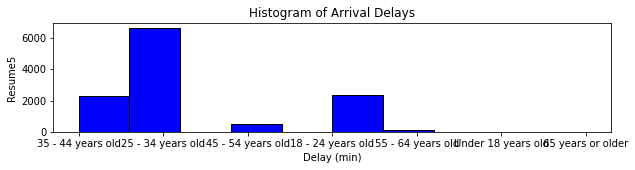

In [123]:
# matplotlib histogram
plt.hist(Resume5['Age'], color = 'blue', edgecolor = 'black')

# seaborn histogram
# sns.distplot(Resume4['Age'], hist=True, kde=False,color = 'blue',hist_kws={'edgecolor':'black'})
# Add labels
plt.rcParams['figure.figsize']=[10,2]
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Resume5')


In [124]:
pd.crosstab(Resume5['Age'],Resume5['Gender']).apply(lambda r: r*100/r.sum(), axis=1)

Gender,Female,Male,other
Age,,,
18 - 24 years old,4.964241,93.226756,1.809003
25 - 34 years old,5.785498,92.839879,1.374622
35 - 44 years old,4.059363,94.456569,1.484068
45 - 54 years old,4.150198,95.454545,0.395257
55 - 64 years old,4.716981,93.396226,1.886792
65 years or older,0.000000,100.000000,0.000000
Under 18 years old,0.000000,100.000000,0.000000


In [125]:
pd.crosstab(Resume5['Age'],Resume5['Salary_group']).apply(lambda r: r*100/r.sum(), axis=1)

Salary_group,500-1500,1501-5000,5001-10000,10001-16000,16001-30000,30001-45000,45001-63000,63001-79000,79001-89000,89001-100000
Age,,,,,,,,,,
18 - 24 years old,12.999579,36.095919,19.520404,5.342869,10.896088,7.109802,3.660076,2.103492,1.009676,1.262095
25 - 34 years old,3.308157,33.081571,30.906344,8.972810,5.755287,6.933535,5.287009,2.537764,1.374622,1.842900
35 - 44 years old,0.916630,24.661720,37.974684,19.380183,4.714099,4.015714,4.059363,2.357049,1.047577,0.872981
45 - 54 years old,0.395257,14.426877,43.675889,25.098814,5.533597,3.754941,2.766798,1.778656,1.581028,0.988142
55 - 64 years old,0.943396,10.377358,35.849057,35.849057,4.716981,3.773585,4.716981,1.886792,0.000000,1.886792
65 years or older,0.000000,0.000000,50.000000,25.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Under 18 years old,73.333333,26.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [126]:
analysis = Resume5.groupby('Age')['Gender'].value_counts()
analysis

Age                 Gender
18 - 24 years old   Male      2216
                    Female     118
                    other       43
25 - 34 years old   Male      6146
                    Female     383
                    other       91
35 - 44 years old   Male      2164
                    Female      93
                    other       34
45 - 54 years old   Male       483
                    Female      21
                    other        2
55 - 64 years old   Male        99
                    Female       5
                    other        2
65 years or older   Male         4
Under 18 years old  Male        15
Name: Gender, dtype: int64

In [127]:
Resume5

,Respondent,Country,Student,CompanySize,Dependents,DevType,Gender,JobSatisfaction,LastNewJob,Salary_group,...,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,OperatingSystem,Age,skills
1,3,United Kingdom,No,"10,000 or more employees",Yes,"[Database administrator, DevOps specialist, Fu...",Male,Moderately dissatisfied,More than 4 years ago,1501-5000,...,Go;Python,"Redis,PostgreSQL,Memcached",PostgreSQL,Linux,Linux,Django,React,Linux-based,35 - 44 years old,"[linux, redis, django, javascript, bash/shell,..."
17,27,Sweden,No,10 to 19 employees,Yes,[Back-end developer],Male,Moderately satisfied,Between 1 and 2 years ago,30001-45000,...,C#;F#;Haskell;SQL;Ocaml,SQL Server,Redis;SQL Server;PostgreSQL;Elasticsearch,"Linux,Windows Desktop or Server",Linux;Windows Desktop or Server,.NET Core,.NET Core,Windows,35 - 44 years old,"[linux, windows desktop or server, html, sql, ..."
20,33,Australia,No,"1,000 to 4,999 employees",Yes,"[Database administrator, Full-stack developer,...",Male,Slightly satisfied,Between 2 and 4 years ago,5001-10000,...,C;C++;Go;Python;SQL;Swift;Kotlin,"Redis,PostgreSQL,SQLite",Redis;PostgreSQL;SQLite;Google BigQuery,"Android,AWS,iOS,Linux,Mac OS,Firebase",Android;AWS;Google Cloud Platform/App Engine;i...,"Angular,Node.js",Angular;Node.js;TensorFlow,MacOS,35 - 44 years old,"[aws, angular, linux, sqlite, redis, firebase,..."
24,39,India,No,100 to 499 employees,No,[Mobile developer],other,Moderately satisfied,Between 1 and 2 years ago,45001-63000,...,Java;JavaScript;Swift;Kotlin,"SQL Server,MySQL",MySQL,"Android,iOS,Firebase",Android;iOS;Firebase,"Angular,Cordova",Cordova,MacOS,25 - 34 years old,"[mysql, angular, kotlin, firebase, c, java, sq..."
30,47,Poland,No,20 to 99 employees,No,"[Back-end developer, Engineering manager]",Male,Slightly satisfied,Less than a year ago,5001-10000,...,Erlang;Go;JavaScript;Rust,"MongoDB,Redis,MySQL,PostgreSQL",Memcached;Elasticsearch,Linux,Heroku;Raspberry Pi,Django,React;TensorFlow,Linux-based,25 - 34 years old,"[mysql, linux, redis, mongodb, html, django, s..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71504,101559,Italy,No,100 to 499 employees,No,"[Front-end developer, Game or graphics develop...",Male,Moderately satisfied,Less than a year ago,1501-5000,...,C;C++;Java;JavaScript;TypeScript;VB.NET;HTML;CSS,"MySQL,PostgreSQL",MongoDB;MySQL;PostgreSQL;SQLite;Microsoft Azur...,"Android,iOS,Windows Phone",Gaming console;iOS;Raspberry Pi;Windows Deskto...,"Angular,Cordova",Hadoop;Node.js;React;Xamarin,Windows,25 - 34 years old,"[mysql, angular, html, cordova, windows phone,..."
71510,101567,Australia,"Yes, full-time","10,000 or more employees",No,[Back-end developer],Male,Moderately satisfied,Between 1 and 2 years ago,10001-16000,...,Java;JavaScript;Python;Ruby;TypeScript;Kotlin,"MySQL,PostgreSQL,Amazon DynamoDB,Amazon Redshi...",Amazon DynamoDB,"Amazon Echo,Android",Amazon Echo,"Node.js,React,Spring",Spring,MacOS,25 - 34 years old,"[mysql, spring, amazon redshift, amazon rds/au..."
71512,101569,Russian Federation,No,20 to 99 employees,No,[Back-end developer],Male,Extremely satisfied,Less than a year ago,89001-100000,...,Java;SQL;Kotlin,"Redis,PostgreSQL",Cassandra;Redis;PostgreSQL;Elasticsearch,"Linux,Windows Desktop or Server",Android;Linux;Windows Desktop or Server,Spring,Spring,Windows,25 - 34 years old,"[spring, linux, redis, windows desktop or serv..."
71524,101584,United States,"Yes, full-time",20 to 99 employees,No,"[Back-end developer, C-suite executive (CEO, ...",Male,Extremely satisfied,More than 4 years ago,10001-16000,...,Clojure;R,"Redis,SQL Server,PostgreSQL,Microsoft Azure (T...",Redis;PostgreSQL,"AWS,Azure,Google Cloud Platform/App Engine,Lin...",Linux,"Django,Node.js,React,TensorFlow,Torch/PyTorch",Django;React;TensorFlow;Torch/PyTorch,MacOS,35 - 44 years old,"[aws, r, redis, sql, microsoft azure (tables,..."


In [128]:
sub= Resume5[['Respondent','skills']]
aprioriData1 = pd.DataFrame(sub)
aprioriData1


,Respondent,skills
1,3,"[linux, redis, django, javascript, bash/shell,..."
17,27,"[linux, windows desktop or server, html, sql, ..."
20,33,"[aws, angular, linux, sqlite, redis, firebase,..."
24,39,"[mysql, angular, kotlin, firebase, c, java, sq..."
30,47,"[mysql, linux, redis, mongodb, html, django, s..."
...,...,...
71504,101559,"[mysql, angular, html, cordova, windows phone,..."
71510,101567,"[mysql, spring, amazon redshift, amazon rds/au..."
71512,101569,"[spring, linux, redis, windows desktop or serv..."
71524,101584,"[aws, r, redis, sql, microsoft azure (tables,..."


In [146]:
apridata = []
# Only take first 500 rows
count=500;
for index,data in aprioriData1.iterrows():
    eachapridata=[]
    eachapridata.append(data['Respondent'])
    eachapridata.append(data['skills'])
    apridata.append(eachapridata)
    count-=1
    if(count<=0):
        break
# print(apridata)
data=apridata
# data

In [147]:
init = []
for i in apridata:
    for q in i[1]:
        if(q not in init):
            init.append(q)
init = sorted(init)

print(len(init))

98


In [140]:
sp = 0.4
s = int(sp*len(init))
s

39

In [148]:
from collections import Counter
c = Counter()
for i in init:
    for d in data:
        if(i in d[1]):
            c[i]+=1
print("C1:")
for i in c:
    print(str([i])+": "+str(c[i]))
print()
l = Counter()
for i in c:
    if(c[i] >= s):
        l[frozenset([i])]+=c[i]
print("L1:")
for i in l:
    print(str(list(i))+": "+str(l[i]))
print()
pl = l
pos = 1
for count in range (2,1000):
    nc = set()
    temp = list(l)
    for i in range(0,len(temp)):
        for j in range(i+1,len(temp)):
            t = temp[i].union(temp[j])
            if(len(t) == count):
                nc.add(temp[i].union(temp[j]))
    nc = list(nc)
    c = Counter()
    for i in nc:
        c[i] = 0
        for q in data:
            temp = set(q[1])
            if(i.issubset(temp)):
                c[i]+=1
    print("C"+str(count)+":")
    for i in c:
        print(str(list(i))+": "+str(c[i]))
    print()
    l = Counter()
    for i in c:
        if(c[i] >= s):
            l[i]+=c[i]
    print("L"+str(count)+":")
    for i in l:
        print(str(list(i))+": "+str(l[i]))
    print()
    if(len(l) == 0):
        break
    pl = l
    pos = count
print("Result: ")
print("L"+str(pos)+":")
for i in pl:
    print(str(list(i))+": "+str(pl[i]))
print()

C1:
[' cosmosdb']: 56
[' sql']: 56
['.net core']: 162
['amazon dynamodb']: 38
['amazon echo']: 18
['amazon rds/aurora']: 38
['amazon redshift']: 11
['android']: 155
['angular']: 206
['apache hbase']: 11
['apache hive']: 13
['apple watch or apple tv']: 9
['arduino']: 44
['assembly']: 24
['aws']: 166
['azure']: 75
['bash/shell']: 229
['c']: 85
['c#']: 231
['c++']: 99
['cassandra']: 22
['clojure']: 4
['cobol']: 1
['coffeescript']: 23
['cordova']: 42
['css']: 370
['delphi/object pascal']: 10
['django']: 64
['drupal']: 23
['elasticsearch']: 106
['erlang']: 6
['esp8266']: 14
['f#']: 9
['firebase']: 75
['gaming console']: 8
['go']: 49
['google bigquery']: 18
['google cloud platform/app engine']: 48
['google cloud storage']: 28
['google home']: 7
['groovy']: 37
['hadoop']: 26
['haskell']: 7
['heroku']: 74
['html']: 385
['ibm cloud or watson']: 12
['ibm db2']: 12
['ios']: 76
['java']: 247
['javascript']: 415
['julia']: 3
['kotlin']: 29
['linux']: 253
['lua']: 16
['mac os']: 91
['mainframe']: 3


In [150]:
from itertools import combinations
for l in pl:
    c = [frozenset(q) for q in combinations(l,len(l)-1)]
    mmax = 0
    for a in c:
        b = l-a
        ab = l
        sab = 0
        sa = 0
        sb = 0
        for q in data:
            temp = set(q[1])
            if(a.issubset(temp)):
                sa+=1
            if(b.issubset(temp)):
                sb+=1
            if(ab.issubset(temp)):
                sab+=1
        temp = sab/sa*100
        if(temp > mmax):
            mmax = temp
        temp = sab/sb*100
        if(temp > mmax):
            mmax = temp
        print(str(list(a))+" -> "+str(list(b))+" = "+str(sab/sa*100)+"%")
        print(str(list(b))+" -> "+str(list(a))+" = "+str(sab/sb*100)+"%")
    curr = 1
    print("choosing:", end=' ')
    for a in c:
        b = l-a
        ab = l
        sab = 0
        sa = 0
        sb = 0
        for q in data:
            temp = set(q[1])
            if(a.issubset(temp)):
                sa+=1
            if(b.issubset(temp)):
                sb+=1
            if(ab.issubset(temp)):
                sab+=1
        temp = sab/sa*100
        if(temp == mmax):
            print(curr, end = ' ')
        curr += 1
        temp = sab/sb*100
        if(temp == mmax):
            print(curr, end = ' ')
        curr += 1
    print()
    print()

['mysql', 'html', 'node.js', 'sql', 'javascript', 'bash/shell', 'php'] -> ['css'] = 93.18181818181817%
['css'] -> ['mysql', 'html', 'node.js', 'sql', 'javascript', 'bash/shell', 'php'] = 11.081081081081082%
['mysql', 'css', 'html', 'node.js', 'sql', 'javascript', 'php'] -> ['bash/shell'] = 66.12903225806451%
['bash/shell'] -> ['mysql', 'css', 'html', 'node.js', 'sql', 'javascript', 'php'] = 17.903930131004365%
['mysql', 'css', 'html', 'node.js', 'sql', 'bash/shell', 'php'] -> ['javascript'] = 100.0%
['javascript'] -> ['mysql', 'css', 'html', 'node.js', 'sql', 'bash/shell', 'php'] = 9.879518072289157%
['mysql', 'css', 'html', 'node.js', 'javascript', 'bash/shell', 'php'] -> ['sql'] = 85.41666666666666%
['sql'] -> ['mysql', 'css', 'html', 'node.js', 'javascript', 'bash/shell', 'php'] = 11.68091168091168%
['mysql', 'css', 'html', 'sql', 'javascript', 'bash/shell', 'php'] -> ['node.js'] = 77.35849056603774%
['node.js'] -> ['mysql', 'css', 'html', 'sql', 'javascript', 'bash/shell', 'php'] =

['mysql', 'css', 'html', 'node.js', 'sql', 'bash/shell', 'php'] -> ['javascript'] = 100.0%
<br>
['windows desktop or server', 'sql', 'javascript', 'c#', '.net core', 'css', 'sql server'] -> ['html'] = 97.91666666666666%
<br>
['mysql', 'linux', 'node.js', 'sql', 'javascript', 'bash/shell', 'css'] -> ['html'] = 97.5%


In [134]:
# mlb = MultiLabelBinarizer(sparse_output=True)

# aprioriData2 = aprioriData1.join(
#             pd.DataFrame.sparse.from_spmatrix(
#                 mlb.fit_transform(aprioriData1.pop('skills')),
#                 index=aprioriData1.index,
#                 columns=mlb.classes_))
# aprioriData2.drop(['Respondent'],axis=1)


In [135]:
# for index,data in aprioriData2.iterrows():
#     for  dev in data:
#         if dev==3:
#             print(index,data)

In [136]:
for column in aprioriData2:
    print((aprioriData2[column]==3).any())

NameError: name 'aprioriData2' is not defined

In [ ]:
frq_items = apriori(aprioriData2, min_support = 0.05, use_colnames = True)
 
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 3

### Build Graph on Neo4j


In [ ]:
Resume6.head()

In [ ]:
from neo4j import GraphDatabase
import logging
from neo4j.exceptions import ServiceUnavailable

class App:

    def __uniqueSkillsList__(self, uri, user, password):
        self.driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        # Don't forget to close the driver connection when you are finished with it
        self.driver.close()

    def create_friendship(self, person1_name,skillVal,gednerVal,osNameVal,countryNameVal,saleryVal,devTypeVal,ageVal,dependsVal):
        with self.driver.session() as session:
            # Write transactions allow the driver to handle retries and transient errors
            result = session.write_transaction(
                self._create_and_return_friendship, person1_name,skillVal,gednerVal,osNameVal,countryNameVal,saleryVal,devTypeVal,ageVal,dependsVal)
            for row in result:
                print("Created Node between: {p1}, {p2}".format(p1=row['p1'], p2=row['p2']))

    @staticmethod
    def _create_and_return_friendship(tx, person1_name, skillVal ,gednerVal,osNameVal,countryNameVal,saleryVal,devTypeVal,ageVal,dependsVal):
        # To learn more about the Cypher syntax, see https://neo4j.com/docs/cypher-manual/current/
        # The Reference Card is also a good resource for keywords https://neo4j.com/docs/cypher-refcard/current/
        query = (
            "MERGE (p1:ResumeId { name: $person1_name }) "
            "MERGE (p2:Gender { name: $gednerVal }) "
            "MERGE (p3:OperatingSystem { name: $osNameVal }) "
            "MERGE (p4:Country { name: $countryNameVal }) "
            "MERGE (p5:Salery { name: $saleryVal }) "
            "MERGE (p6:DevType { name: $devTypeVal }) "
            "MERGE (p7:Age { name: $ageVal }) "
            "MERGE (p8:Dependents { name: $dependsVal }) "
            "CREATE (p1)-[:isA]->(p2) "
            "CREATE (p1)-[:hasOs]->(p3) "
            "CREATE (p1)-[:livesIn]->(p4) "
            "CREATE (p1)-[:earns]->(p5) "
            "CREATE (p1)-[:worksOn]->(p6) "
            "CREATE (p1)-[:liesIn]->(p7) "
            "CREATE (p1)-[:has]->(p8) "
            "RETURN p1,p2,p3,p4,p5,p6,p7,p8"
        )
        result = tx.run(query, person1_name=person1_name,gednerVal=gednerVal,osNameVal=osNameVal,countryNameVal=countryNameVal,saleryVal=saleryVal,devTypeVal=devTypeVal,ageVal=ageVal,dependsVal=dependsVal )
        try:
            return [{"p1": row["p1"]["name"], "p2": row["p2"]["name"]}
                    for row in result]
        # Capture any errors along with the query and data for traceability
        except ServiceUnavailable as exception:
            logging.error("{query} raised an error: \n {exception}".format(
                query=query, exception=exception))
            raise

    def find_person(self, person_name):
        with self.driver.session() as session:
            result = session.read_transaction(self._find_and_return_person, person_name)
            for row in result:
                print("Found person: {row}".format(row=row))

    @staticmethod
    def _find_and_return_person(tx, person_name):
        query = (
            "MATCH (p:Person) "
            "WHERE p.name = $person_name "
            "RETURN p.name AS name"
        )
        result = tx.run(query, person_name=person_name)
        return [row["name"] for row in result]


if __name__ == "__main__":
    # Aura queries use an encrypted connection using the "neo4j+s" URI scheme
    uri = "neo4j://localhost:7687"
    user = "neo4j"
    password = "amit"
    app = App(uri, user, password)
    for index,rows in Resume5.iterrows():
        resId=rows['Respondent'] 
        skillVal=rows['skills']
        gednerVal=rows['Gender']
        osNameVal=rows['OperatingSystem']
        countryNameVal=rows['Country']
        saleryVal=rows['Salary']
        devTypeVal=rows['DevType']
        ageVal=rows['Age']
        dependsVal=rows['Dependents']
        # print(resId,gednerVal)
        app.create_friendship(resId,skillVal,gednerVal,osNameVal,countryNameVal,saleryVal,devTypeVal,ageVal,dependsVal)
    app.find_person("India")
    app.close()